# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
minimum_price = prices.min()       # Minimum housing value
maximum_price = prices.max()       # Maximum housing value
mean_price = prices.mean()         # Mean house value of the dataset
median_price = prices.median()     # Median house value of the dataset
#std_price = prices.std(ddof=0)    # Biased Estimate of SD
std_price = prices.std(ddof=1)     # Unbiased Estimate of SD

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** Intuitively it may be reasonable to assume that there would be a positive correlation between the `'RM'` feature and the the output variable for prices. If we have a region which has on average a greater number of rooms per house, then this may be indicative of bigger homes, which cost more to build, potentially also taking up more landspace. By contrast, it would be reasonable to assume that the other two features `'LSTAT'` and `'PTRATIO'` would have a negative correlation with housing prices in the area. A greater proportion of people from lower socio-economic status in an area would indicate that the housing in that area would be more affordable, and have a lower proportion of expensive homes. A high student-teacher ratio would likely occur in a region that does not receive as much funding, indicating that it does not have as many wealthy people in the area, which would likely mean less expensive housing. 

We can explore these assumptions by creating some scatter plots.

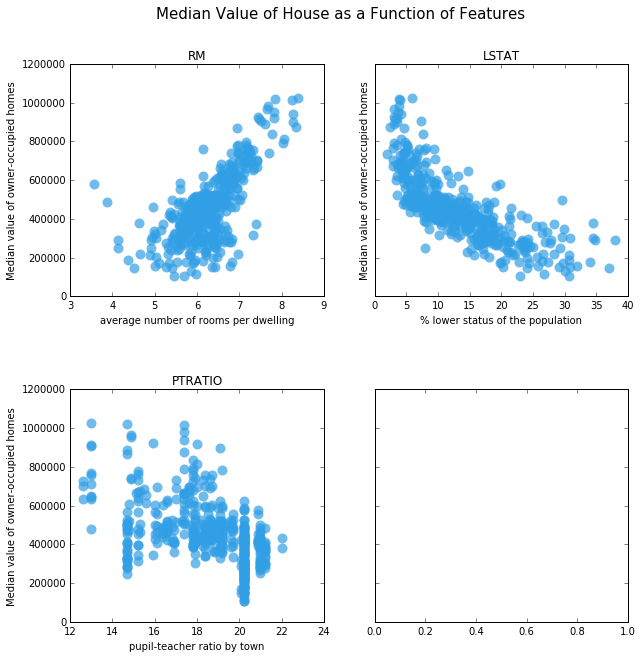

In [3]:
import matplotlib.pyplot as plt 

#===============================================================================
#                               SCATTER PLOTS TO EXPLORE POTENTIAL CORRELATIONS
#===============================================================================
# Labels for each plot
feature_names = ["RM", "LSTAT", "PTRATIO"]
x_labels = ["average number of rooms per dwelling", 
            "% lower status of the population",
            "pupil-teacher ratio by town"]
y_label = "Median value of owner-occupied homes"

# Create grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10), sharey=True)

# Flatten axes to a flat list to iterate over axes more easily
axes = [axis for sublist in axes for axis in sublist][:3]

# PLOT
fig.suptitle('Median Value of House as a Function of Features', fontsize=15)
for feature_name, label, axis in zip(feature_names, x_labels, axes):
    axis.scatter(features[feature_name], prices, 
                 c="#319fe5", s=100, alpha=0.7, linewidths=0)
    axis.set_title(feature_name)
    axis.set_xlabel(label)
    axis.set_ylabel(y_label)

# Add some spacing so x-axis labels and subplot titles do not overlap
fig.subplots_adjust(hspace=0.4)

The correlation certainly appears to be quite strong for `'RM'` and `'LSTAT'` precisely in the direction that we had assumed it to be. Our assumption about `'PTRATIO'` also appears to be correct, however it does not appear to be as strongly correlated as the other features are. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [4]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
                             
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** This toy model demonstrates that it captures the variation of the target variable quite well. The predicted values are within the vicinity of the true expected values. It is not perfect, but it gets quite close most of the time. Correspondingly, we end up with an $R^2$ value that is quite high, at 0.923.  

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices,
                                                    test_size=0.2, 
                                                    random_state=732)
# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** Before training a It is good practice to split the data into training and test subsets so that we can get a more representative estimate of how well our trained model will actually perform. If we were to evaluate how good our model is using the exact same data that we trained it on, then we would get an overly optimistic estimate. We may end up with a model that does really well at predicting all the training samples, but this may mislead us into thinking that the model will also do well on new data it has never come across. By setting asside a portion of the data to only be used during the evaluation phase, we get a better idea of how good our model will be at making predictions on completely new data. So this way we get a better idea of whether our model generalises well to new data, or if it is overfitting to our training data.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

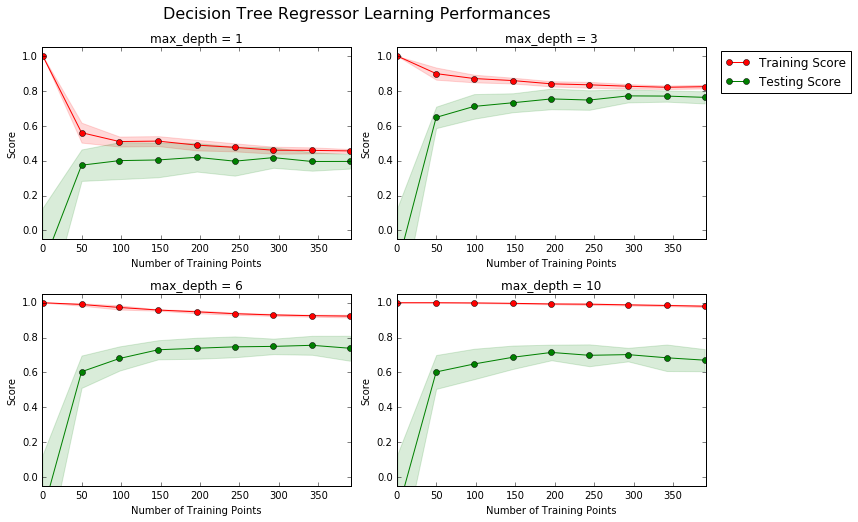

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** From learning curves above we can see a certain trend between the number of samples and the performance as measured using the training and testing sets. The plot for max depth=3 makes this trend the most visible. We see that if we train using a small sample size, we get get a model that easily overfits to the data, and gives an unrealistically optimistic estimate of its performance when evaluated on the training set data. It is easy to create a model that fits very well to a small number of data points. But this results in a model that does not generalise very well to unseen data. This results in a low $R^2$ score on the testing set. As we use larger and larger sample sizes, it becomes harder to create a model that fits well to all of the data, so the $R^2$ value evaluated on the training data decreases. But, we do get a model that is capable of generalizing better. So we see that the $R^2$ score on the testing data increases. The goal is to create a model where the $R^2$ score performed on the training data and testing data are close to each other. Making use of aditional training data would likely help to close the gap between the performance on training and testing data, hence leading to a better, more generalizable model, though these improvements will likely be quite modest given that the curves have more or less flattened out by the number of data samples already considered. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

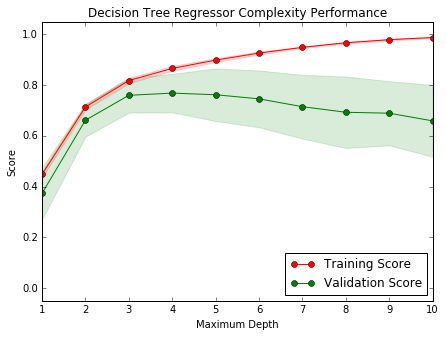

In [8]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** If we look at the model created with max_depth=1, we see that the $R^2$ score is quite low for both training and validation data. This is a condition known as *high bias*. Essentially, the model is not paying enough attention to the features in our data. In this case it is creating a model that is too simple to capture the nuances and intricacies of the data.  

If on the other hand we look at the model created with max_depth=10, we see that we have an $R^2$ score on the training data that is quite high, but the score on the validation data is a lot lower. This is a condition known as *high variance*, which means that the model is paying too much attention to the specifics of the training data points. When this is the case, it does not allow the model to generalise as well to new data as would be suggested by the overly optimistic estimate of performance on the training data. In this case, it is creating a model that is too complex.


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: ** The model complexity curves show us that as we increase the value for the max depth hyper-parameter, we get a better measure of performance when tested on the training data. This tells us that the model becomes better at describing that data set. But, we also see that the performance improves only up to a certain point and then decreases again when tested on the validation data. What this tells us is that although increasing the max depth appears to improve the performance of the model, there is a point beyond which increasing the max depth no longer has a desirable effect. In fact, it appears to have an undesirable effect once you increase the max depth beyond 4. 

This suggests that increasing the max depth beyond avalue of 4 or 5, will cause our model to overfit. It is becoming too complex, and fitting too well to the specific data points in our training data, but becoming less capable of generalizing to data it was not trained on. So based on this plot, it would appear that the best value for max depth would be about 4. 

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **  Different learning algorithms have different settings you can tune. These settings are known as the hyper-parameters of a model. Each one of these hyper-paramters can be thought of as a dial on a dashboard, where we can rotate the dial to get different values. The values (and combination of values) used for these hyper-parameters have an effect on how good the trained model will be. However, it is often a matter of trial and error to find values (or a combination of values) to these hyper-parameters that give the best results. With the grid search algorithm, you specify a list of values you want to explore for each of the hyper-parameters you want to tune. It then trains as many models as needed to explore every single combination of these different values. By storing the performance for each of these models, we can then compare which set of values results in the best model, and we use this to chose the model we want to keep (or just the hyper-parameters that resulted in that model).  

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** 

In the process of performing a grid search, we need to evaluate and compare different models in order to select which one is the best. It is not a good idea to evaluate each of these models using the test set we put aside previously. The reason for this is that we would in effect be tuning our algorithms to the specifics of that test set. We would essentially be treating that test set as a training set. We would preferably not want to touch that test set until the very end, to make a final, unbiased estimate of the performance of the model. So we need some other way of evaluating each of the models we train in grid search. 

We could just evaluate the model on the exact same data we use to train it with. But this would result in an overly optimistic estimate of performance, and it would give preferential treatment to models that overfit (perform incredibly well on test set, but fail to generalise well on unseen data). 

We could alternatively split the training data even further, into another train/test subset. This would be a better solution, but the problem is that the data used for training becomes smaller and smaller, and we would like to use as much of the data as possible. 

Fortunately there is a technique known as *cross validation* that allows us to train on all of the available training data, while providing a good estimate of how well the model performs on new data. The version of cross validation we will be using is called *k-fold cross validation*. It works in the following way. It starts by splitting the data into a certain number of sections (*folds*). We refer to the number of folds by the number *k*. We start by setting aside one of those folds, and treat it as if it were a test set. The remaining folds are treated as the training data. We then train a model on this train/test subset and evaluate it's performance. We do this k number of times so that all of the folds get a turn at being used as the test set (and the remaining data as the training set). We take the average over the k different estimates of performance, and use this as our actual estimate of what the model should be if we had trained it on the entire training data set. 

This approach is beneficial since it essentially allows us to use the entire training set for training and for evaluation, without as much fear that the estimate of performance is overly tuned to the specific subset of data. In the case of gridsearch, it allows us to make reasonable estimates about which model is indeed the best, not just for the specific training data, but in selecting which one will potentially be the best for making predictions on new data. 

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input 
    data X and target labels y and returns this optimal model. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, 
                           random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameters for gridsearch to explore
    params = {'max_depth': np.arange(1,11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid =  GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_fnc)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_


### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Run 10 trials to get an estimate of what the best value for max depth is 
max_depth_trials = []
for i in range(10):
    reg = fit_model(X_train, y_train)
    max_depth_trials.append(reg.get_params()['max_depth'])
print 'On average, the best model has a max depth of:', np.mean(max_depth_trials)


On average, the best model has a max depth of: 4.0


**Answer: ** Based on the output, we can see that our interepetation of the complexity plots was correct, exactly. A max depth of 4 is indeed the value that resulted in the best model. 

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [12]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $339,069.23
Predicted selling price for Client 2's home: $236,451.92
Predicted selling price for Client 3's home: $945,420.00


**Answer: **  We saw previously that the range of prices in the dataset ranged from \$105,000 to \$1,024,800. We also saw that ther was a positive corelation between the number of rooms and the price, and a correlation between socio economic status and price. The predictions above seem consistent with the observations we previously made. Client 3, has the most number of rooms, and is of fairly high socio-economic status. The predicted price is consistent with those properties, predicting a very high property value. Client 2 by contrast has the house with the least number of rooms, and of socio-economic status that is within the bottom half of society. The predicted price for this client's home is towards the bottom of the range of house prices. Client 1, has just one more room than client 2, and is of slightly higher socio-economic status, the predicted price is accordingly a little higher. 

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [16]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $103,732.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer:**  Given the small amount of training data in this dataset, it is dificult to create a model that is robust enough to be reliable. As we saw from the above output, the model fluctuates in its predictions by an order of \$100,000 when trained on slightly different subsets of the data. If we recomended a selling price of \$300,000 for a home that was worth \$400,000 we would lose the trust of our clients quite quickly. Alternatively, if we tried to sell a house for \$400,000 that was truly only worth \$300,000 we would have a dificult time selling it for our clients, again losing their confidence in us. We would need to make use of more datapoints to make better estimates. 

The data itself is also quite old, and may not be representative of the housing market today. Even after adjustment for inflation, there are other factors that may affect the value of homes. Improvements in construction since that time may have resulted in houses that can be built more affordably. So the age of the house may be an important feature that would play a role. 

The data set also does not capture properties at the very top end. The maximum price in our dataset is sligthly over a million dollars. However there are luxury homes in Boston that are worth many millions of dollars. This affects our ability to create a model that would reliably valuate luxury homes. 

Looking at a [heatmap](http://www.trulia.com/real_estate/Boston-Massachusetts/) of actual selling prices in todays market we can see that there tends to be a concentration of more highhly valued properties that are within a certain distance from the city center, and a drop in property values for more distant locations. Distance from a major city is not a feature that is captured in our data. 

This is not to say that our model is useless. It can be used to give us a very rough idea, and can be used to compare which homes *might* be worth more than others. But it should not be used to make reliable property predictions.   